In [2]:
import numpy as np
import matplotlib.pyplot as plt

Table of content:
- Formal definition (of a perceptron)
- Geometric interpretation (of a perceptron)

Table of content:
- Formal definition
- Geometric interpretation

## Formal definition

For a binary classification problem, a perceptron is formally defined as follows:

For a input feature vector of $I$ entries, $\vec{\phi} = \{x_1, \cdots, x_i, \cdots, x_I\}$, its classification, $y\in\{-1, 1\}$, is given by

$$y=\text{sign}(w_0 + \sum_{i=1}^I w_i \phi_i)$$

where
- $\sum_{i=1}^I w_i \phi_i$ is a linear combination of the input variables.
- $w_0$ is called the bias; $-w_0$ is called the threshold, the minimum value of $\sum_{i=1}^I w_i \phi_i$ for the $\text{sign}$ function to output 1.
- 
$
\text{sign}(a) = 
\begin{cases}
    -1, & \text{when } a < 0 \\
    +1, & \text{when } a \geq 0
\end{cases}
$

By adding another entry, $x_0=1$, to $\vec{\phi}$, we can write the perceptron in a more convenient vector notation:

$$
\begin{align}
y&=\text{sign}(w_0 + \sum_{i=1}^I w_i \phi_i) \\
&=\text{sign}(\sum_{i=0}^I w_i \phi_i) \\
&=\text{sign}(\vec{w} \cdot \vec{\phi}) \text{, or } \text{sign}(\vec{w}^T \vec{\phi})
\end{align}
$$

By adding another entry, $x_0=1$, to $\vec{\phi}$, we can write the perceptron in a more convenient vector notation (that will help us interpret the perceptron):

$$
\begin{align}
y&=\text{sign}(w_0 + \sum_{i=1}^I w_i \phi_i) \\
&=\text{sign}(\sum_{i=0}^I w_i \phi_i) \\
&=\text{sign}(\vec{w} \cdot \vec{\phi}) \text{, or } \text{sign}(\vec{w}^T \vec{\phi})
\end{align}
$$

## Geometric Interpretation

$$y=\text{sign}(\vec{w} \cdot \vec{\phi})$$

$$y=\text{sign}(\color{red}{\vec{w} \cdot \vec{\phi}})$$

$$y=\color{red}{\text{sign}}(\vec{w} \cdot \vec{\phi})$$

Let's look at the vectorized form of the perceptron. What do you see here? (wait for 3 seconds.) For me, I see two procedures being applied to the input vector $\vec{\phi}$. First, I see $\vec{\phi}$ being projected onto $\vec{w}$ through the dot product. Second, I see that the sign function checks whether that project is positive or negative. So, what's the consequence of these two procedures?

Let's first focus on the interpretation of the first procedure, the dot product, in two dimensions:

## Geometric interpretation of the dot product

In [7]:
w = np.array([[3], [4]]) / 5

In [8]:
np.linalg.norm(w)

1.0

Let's create an arbitrary weight vector. I made it length one. Why? Because 

When $||\vec{w}||\neq1$,

$$\vec{w}\cdot\vec{\phi} = ||\vec{w}|| ||\vec{\phi}|| \cos(\theta)$$

When $||\vec{w}=1||$,

$$\vec{w}\cdot\vec{\phi} = ||\vec{\phi}|| \cos(\theta)$$

According to the dot product formula above
- When $||\vec{w}||\neq1$, the dot product is the project of $\vec{\phi}$ in the direction of $\vec{w}$ scaled by the norm of $\vec{w}$.
- When $||\vec{w}||=1$, the dot product is the projection of $\vec{\phi}$ in the direction of $\vec{w}$.

Obviously, the second case is easier for interpretation. Note that in practice $||\vec{w}||$ does not neccessarily have a norm of 1. 

### Create $\vec{\phi}$s with different norms at different angles from $\vec{w}$, and compute dot products

In [67]:
phi_initial = w  

We start from the input vector that points in the same direction as $\vec{w}$. For simplicity, I used a copy of $\vec{w}$.

In [68]:
def get_rotation_matrix(angle_in_rad):
    return np.array([
        [np.cos(angle_in_rad), -np.sin(angle_in_rad)], 
        [np.sin(angle_in_rad), np.cos(angle_in_rad)]
    ])

To obtain $\vec{\phi}$s at different angles from $\vec{w}$, we define a rotation matrix function, which returns a matrix that can rotate any 2D vector by a specified angle.

In [89]:
angles_in_rad = np.arange(0, np.pi * 2, 0.05)
projections = []
for angle_in_rad in angles_in_rad:
    
    rotation_matrix = get_rotation_matrix(angle_in_rad)
    phi = rotation_matrix @ (phi_initial * float(np.random.uniform(0.1, 1)))
    
    projection = float(w.T @ phi)
    projections.append(projection)

projections = np.array(projections)

In [90]:
angles_in_rad = np.arange(0, np.pi * 2, 0.05)   # creates many angles
projections = []  # creates an accumulator for projections

for angle_in_rad in angles_in_rad:
    
    # rotate phi_initial by angle_in_rad, and change its norm
    rotation_matrix = get_rotation_matrix(angle_in_rad)
    phi = rotation_matrix @ phi_initial * float(np.random.uniform(0.1, 1))
    
    # compute dot product
    projection = float(w.T @ phi)  
    
    projections.append(projection)

projections = np.array(projections)  # for plotting

### Plot projection of $\vec{\phi}$ onto $\vec{w}$ against the angle from $\vec{\phi}$ to $\vec{w}$

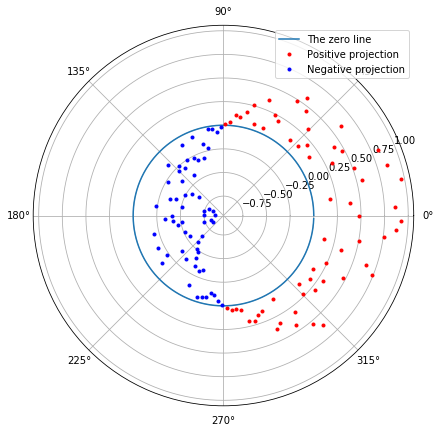

In [94]:
plt.figure(figsize=(7, 7))
plt.polar(angles_in_rad, np.zeros(len(angles_in_rad)), label='The zero line')
plt.polar(angles_in_rad[projections > 0], projections[projections > 0], 'r.', label='Positive projection')
plt.polar(angles_in_rad[projections < 0], projections[projections < 0], 'b.', label='Negative projection')
plt.legend()
plt.show()

Now, let's plot the projection of $\vec{\phi}$ onto $\vec{w}$ against the angle from $\vec{\phi}$ to $\vec{w}$. 

The circular angle axis around the circle represents the angle between $\vec{\phi}$ and $\vec{w}$. For example, $\vec{w}$ is represented by the zero degree mark since it is zero degree away from itself.

The axis here (move mouse over to the radar-like axis) represents the projection of $\vec{\phi}$ onto $\vec{w}$.

 At ninety and two-seventy degrees, the projection is zero. From immediately after two-seventy degrees to immediately before ninety degrees counterclockwise, the projection is positive. From immediately after ninety degrees to immediately before two-seventy degrees counterclockwise, the projection is negative.

## Geometric interpretation of the sign function

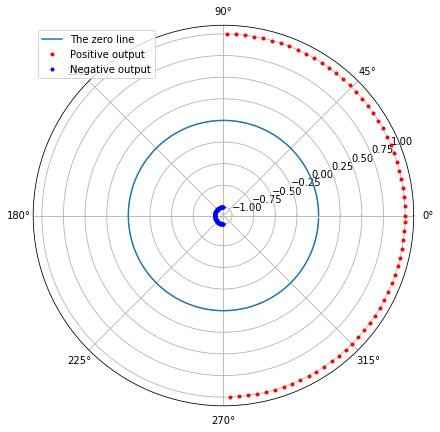

In [95]:
plt.figure(figsize=(7, 7))
plt.polar(angles_in_rad, np.zeros(len(angles_in_rad)), label='The zero line')
plt.polar(angles_in_rad[projections >= 0], np.sign(projections[projections >= 0]), 'r.', label='Positive output')
plt.polar(angles_in_rad[projections < 0], np.sign(projections[projections < 0]), 'b.', label='Negative output')
plt.legend()
plt.show()

Now, let's apply the sign function to the projections. 

## Summary

## Final

The vector $w$ is perpendicular to the decision boundary. When the weight vector is appropriately chose, the +1 -1 assignment of the perceptron will match the label provided by the training data. But how is a perceptron trained? In Episode 2 of the Perceptron series, I will discuss the Perceptron Learning Algorithm (PLA) in detail. 

If you liked this video, please hit the like botton down below and subscribe for future videos. Good luck with your study in machine learning.